# Code to automatically derive variance and optimal sampling allocations 

Uses delta method for different disparity metrics

In [2]:
from sympy import *

In [29]:
p1, P1 = symbols('p1 P1', positive=True)
y1, y2, s1, s2 = symbols('Y_1 Y_2 \sigma_1 \sigma_2')
N1, N2, N = symbols('N_1 N_2 N', positive=True) 
init_printing(use_unicode=True)

In [23]:
def prop(d):
    deriv1 = diff(d, y1)
    deriv2 = diff(d, y2)
    var = deriv1**2*s1**2/p1 + deriv2**2*s2**2/(1-p1)
    deriv = diff(var, p1)
    sln = solve(simplify(deriv), p1, check=False, domain=Interval(0,1))
    print(latex(d))
    print(latex(var))
    print(latex(sln))
    return var, sln

Overall average

\frac{N_{1} Y_{1} + N_{2} Y_{2}}{N}
\frac{N_{1}^{2} \sigma_{1}^{2}}{N^{2} p_{1}} + \frac{N_{2}^{2} \sigma_{2}^{2}}{N^{2} \cdot \left(1 - p_{1}\right)}
\left[ \frac{N_{1} \sigma_{1}}{N_{1} \sigma_{1} - N_{2} \sigma_{2}}, \  \frac{N_{1} \sigma_{1}}{N_{1} \sigma_{1} + N_{2} \sigma_{2}}\right]


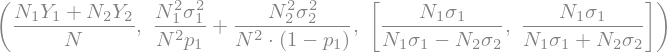

In [30]:
d = 1/N * (N1*y1+N2*y2)
var,sln = prop(d)
d,var,sln

Ratio

\frac{Y_{2}}{Y_{1}}
\frac{\sigma_{2}^{2}}{Y_{1}^{2} \cdot \left(1 - p_{1}\right)} + \frac{Y_{2}^{2} \sigma_{1}^{2}}{Y_{1}^{4} p_{1}}
\left[ - \frac{Y_{2} \sigma_{1}}{Y_{1} \sigma_{2} - Y_{2} \sigma_{1}}, \  \frac{Y_{2} \sigma_{1}}{Y_{1} \sigma_{2} + Y_{2} \sigma_{1}}\right]


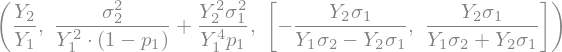

In [27]:
d = y2/y1
var,sln = prop(d)
d,var,sln

Population Attributable Risk (%)

\frac{100 \left(Y_{1} - Y_{2}\right)}{Y_{1}}
\frac{\sigma_{1}^{2} \left(\frac{100}{Y_{1}} - \frac{100 \left(Y_{1} - Y_{2}\right)}{Y_{1}^{2}}\right)^{2}}{p_{1}} + \frac{10000 \sigma_{2}^{2}}{Y_{1}^{2} \cdot \left(1 - p_{1}\right)}
\left[ - \frac{Y_{2} \sigma_{1}}{Y_{1} \sigma_{2} - Y_{2} \sigma_{1}}, \  \frac{Y_{2} \sigma_{1}}{Y_{1} \sigma_{2} + Y_{2} \sigma_{1}}\right]


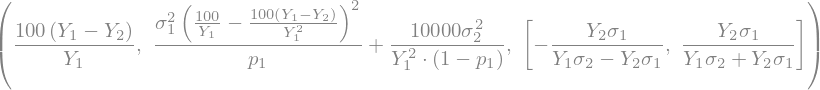

In [28]:
d = (y1-y2)/y1 * 100
var,sln = prop(d)
d,var,sln

Difference

- Y_{1} + Y_{2}
\frac{\sigma_{1}^{2}}{p_{1}} + \frac{\sigma_{2}^{2}}{1 - p_{1}}
\left[ \frac{\sigma_{1}}{\sigma_{1} - \sigma_{2}}, \  \frac{\sigma_{1}}{\sigma_{1} + \sigma_{2}}\right]


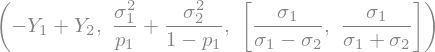

In [25]:
d = y2-y1
var,sln = prop(d)
d,var,sln

Deviation from Equal Representation

8 \left(\frac{y_{1}}{y_{1} + y_{2}} - 0.25\right)^{2} + 8 \left(\frac{y_{2}}{y_{1} + y_{2}} - 0.25\right)^{2}
\frac{s_{2}^{2} \left(- \frac{16 y_{1} \left(\frac{y_{1}}{y_{1} + y_{2}} - 0.25\right)}{\left(y_{1} + y_{2}\right)^{2}} + 8 \left(- \frac{2 y_{2}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{2}{y_{1} + y_{2}}\right) \left(\frac{y_{2}}{y_{1} + y_{2}} - 0.25\right)\right)^{2}}{1 - p_{1}} + \frac{s_{1}^{2} \left(- \frac{16 y_{2} \left(\frac{y_{2}}{y_{1} + y_{2}} - 0.25\right)}{\left(y_{1} + y_{2}\right)^{2}} + 8 \left(- \frac{2 y_{1}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{2}{y_{1} + y_{2}}\right) \left(\frac{y_{1}}{y_{1} + y_{2}} - 0.25\right)\right)^{2}}{p_{1}}
\left[ \frac{s_{1} y_{2}}{s_{1} y_{2} - s_{2} y_{1}}, \  \frac{s_{1} y_{2}}{s_{1} y_{2} + s_{2} y_{1}}\right]


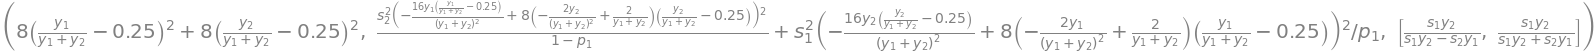

In [170]:
d = 2*((2*y1/(y1+y2) - 1/2)**2 + (2*y2/(y1+y2) - 1/2)**2)
var,sln = prop(d)
d,var,sln

Mean log devation

- P_{1} \log{\left(\frac{2 y_{1}}{y_{1} + y_{2}} \right)} + \left(P_{1} - 1\right) \log{\left(\frac{2 y_{2}}{y_{1} + y_{2}} \right)}
\frac{s_{2}^{2} \left(\frac{P_{1}}{y_{1} + y_{2}} + \frac{\left(P_{1} - 1\right) \left(y_{1} + y_{2}\right) \left(- \frac{2 y_{2}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{2}{y_{1} + y_{2}}\right)}{2 y_{2}}\right)^{2}}{1 - p_{1}} + \frac{s_{1}^{2} \left(- \frac{P_{1} \left(y_{1} + y_{2}\right) \left(- \frac{2 y_{1}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{2}{y_{1} + y_{2}}\right)}{2 y_{1}} - \frac{P_{1} - 1}{y_{1} + y_{2}}\right)^{2}}{p_{1}}
\left[ \frac{s_{1} y_{2}}{s_{1} y_{2} - s_{2} y_{1}}, \  \frac{s_{1} y_{2}}{s_{1} y_{2} + s_{2} y_{1}}\right]


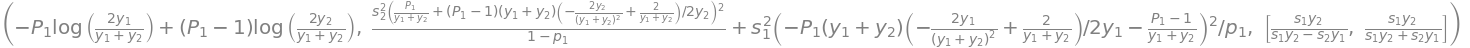

In [176]:
d1 = -1 * P1 * ln(2*y1/(y1+y2))
d2 = -1 * (1-P1) * ln(2*y2/(y1+y2))
d = d1 + d2
var,sln = prop(d)
d,var,sln

Theil's index

\frac{2 P_{1} y_{1} \log{\left(\frac{2 y_{1}}{y_{1} + y_{2}} \right)}}{y_{1} + y_{2}} + \frac{y_{2} \cdot \left(2 - 2 P_{1}\right) \log{\left(\frac{2 y_{2}}{y_{1} + y_{2}} \right)}}{y_{1} + y_{2}}
\frac{s_{2}^{2} \left(- \frac{2 P_{1} y_{1} \log{\left(\frac{2 y_{1}}{y_{1} + y_{2}} \right)}}{\left(y_{1} + y_{2}\right)^{2}} - \frac{2 P_{1} y_{1}}{\left(y_{1} + y_{2}\right)^{2}} - \frac{y_{2} \cdot \left(2 - 2 P_{1}\right) \log{\left(\frac{2 y_{2}}{y_{1} + y_{2}} \right)}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{\left(2 - 2 P_{1}\right) \left(- \frac{2 y_{2}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{2}{y_{1} + y_{2}}\right)}{2} + \frac{\left(2 - 2 P_{1}\right) \log{\left(\frac{2 y_{2}}{y_{1} + y_{2}} \right)}}{y_{1} + y_{2}}\right)^{2}}{1 - p_{1}} + \frac{s_{1}^{2} \left(- \frac{2 P_{1} y_{1} \log{\left(\frac{2 y_{1}}{y_{1} + y_{2}} \right)}}{\left(y_{1} + y_{2}\right)^{2}} + P_{1} \left(- \frac{2 y_{1}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{2}{y_{1} + y_{2}}\right) + \frac{2 P_{1} \log{

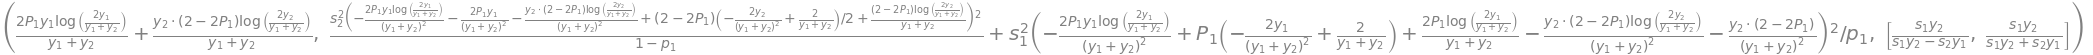

In [172]:
d1 = P1 * 2*y1/(y1+y2) * ln(2*y1/(y1+y2))
d2 = (1-P1) * 2*y2/(y1+y2) * ln(2*y2/(y1+y2))
d = d1 + d2
var,sln = prop(d)
d,var,sln

Generalized entropy index 2

\frac{1.0 y_{1}^{2}}{\left(y_{1} + y_{2}\right)^{2}} + \frac{1.0 y_{2}^{2}}{\left(y_{1} + y_{2}\right)^{2}} - 0.5
\frac{4.0 s_{2}^{2} \left(- \frac{y_{1}^{2}}{\left(y_{1} + y_{2}\right)^{3}} - \frac{y_{2}^{2}}{\left(y_{1} + y_{2}\right)^{3}} + \frac{y_{2}}{\left(y_{1} + y_{2}\right)^{2}}\right)^{2}}{1 - p_{1}} + \frac{4.0 s_{1}^{2} \left(- \frac{y_{1}^{2}}{\left(y_{1} + y_{2}\right)^{3}} + \frac{y_{1}}{\left(y_{1} + y_{2}\right)^{2}} - \frac{y_{2}^{2}}{\left(y_{1} + y_{2}\right)^{3}}\right)^{2}}{p_{1}}
\left[ \frac{s_{1} y_{2}}{s_{1} y_{2} - s_{2} y_{1}}, \  \frac{s_{1} y_{2}}{s_{1} y_{2} + s_{2} y_{1}}\right]


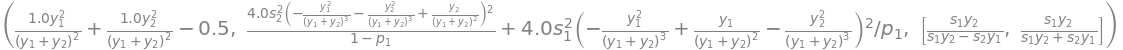

In [173]:
d1 = (2*y1/(y1+y2))**2 - 1
d2 = (2*y2/(y1+y2))**2 - 1
d = 1/4 * (d1 + d2)
var,s = prop(d)
d,var,s

Between-group variance weighted

P_{1} \left(\frac{y_{1}}{2} - \frac{y_{2}}{2}\right)^{2} + \left(1 - P_{1}\right) \left(- \frac{y_{1}}{2} + \frac{y_{2}}{2}\right)^{2}
\frac{s_{2}^{2} \left(P_{1} \left(- \frac{y_{1}}{2} + \frac{y_{2}}{2}\right) + \left(1 - P_{1}\right) \left(- \frac{y_{1}}{2} + \frac{y_{2}}{2}\right)\right)^{2}}{1 - p_{1}} + \frac{s_{1}^{2} \left(P_{1} \left(\frac{y_{1}}{2} - \frac{y_{2}}{2}\right) + \left(1 - P_{1}\right) \left(\frac{y_{1}}{2} - \frac{y_{2}}{2}\right)\right)^{2}}{p_{1}}
\left[ \frac{s_{1}}{s_{1} - s_{2}}, \  \frac{s_{1}}{s_{1} + s_{2}}\right]


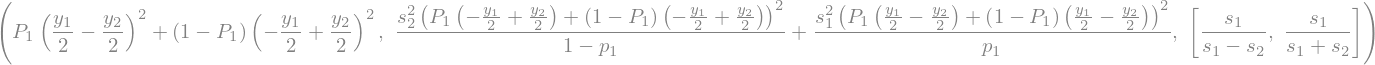

In [12]:
y = (y1+y2)/2
d1 = P1*(y1-y)**2
d2 = (1-P1)*(y2-y)**2
d = (d1 + d2)
var,s = prop(d)
d,var,s

Between-group variance unweighted

\left(- \frac{Y_{1}}{2} + \frac{Y_{2}}{2}\right)^{2} + \left(\frac{Y_{1}}{2} - \frac{Y_{2}}{2}\right)^{2}
\frac{\sigma_{1}^{2} \left(Y_{1} - Y_{2}\right)^{2}}{p_{1}} + \frac{\sigma_{2}^{2} \left(- Y_{1} + Y_{2}\right)^{2}}{1 - p_{1}}
\left[ \frac{\sigma_{1}}{\sigma_{1} - \sigma_{2}}, \  \frac{\sigma_{1}}{\sigma_{1} + \sigma_{2}}\right]


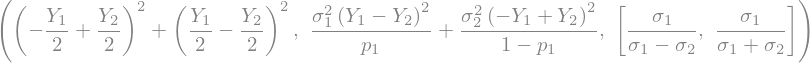

In [26]:
y = (y1+y2)/2
d1 = (y1-y)**2
d2 = (y2-y)**2
d = (d1 + d2)
var,s = prop(d)
d,var,s

Index of disparity

\frac{100 \cdot \left(0.25 y_{1} - 0.25 y_{2}\right)}{\frac{y_{1}}{2} + \frac{y_{2}}{2}}
\frac{2500 s_{2}^{2} \left(- \frac{0.25 y_{1} - 0.25 y_{2}}{\left(\frac{y_{1}}{2} + \frac{y_{2}}{2}\right)^{2}} - \frac{0.5}{\frac{y_{1}}{2} + \frac{y_{2}}{2}}\right)^{2}}{1 - p_{1}} + \frac{2500 s_{1}^{2} \left(- \frac{0.25 y_{1} - 0.25 y_{2}}{\left(\frac{y_{1}}{2} + \frac{y_{2}}{2}\right)^{2}} + \frac{0.5}{\frac{y_{1}}{2} + \frac{y_{2}}{2}}\right)^{2}}{p_{1}}
\left[ \frac{s_{1} y_{2}}{s_{1} y_{2} - s_{2} y_{1}}, \  \frac{s_{1} y_{2}}{s_{1} y_{2} + s_{2} y_{1}}\right]


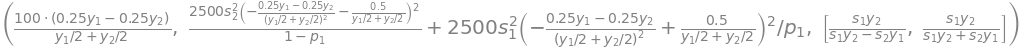

In [175]:
y = (y1+y2)/2
d = 1/2*(y1-y)/y*100
var,s = prop(d)
d,var,s